In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import preprocessing

In [17]:
def set_plot_attr(size_X, size_Y):
    %matplotlib inline
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (size_X, size_Y)
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.titlesize'] = 28
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['axes.linewidth'] = 1

In [18]:
def load_df(csv_name):
    global df
    df = pd.read_csv(csv_name)
    df.ix[:, df.columns!='category'] = preprocessing.MinMaxScaler().fit_transform(df.ix[:, df.columns!='category'])
    print('Shape of the loaded data frame:', df.shape)
    print('\nFirst 5 entries:\n', df.head())

In [19]:
def train_attr(train_col, predict_col):
    global train_X, train_Y
    train_X = DataFrame()
    train_Y = DataFrame()
    train_X = df.iloc[:, train_col]
    train_Y = df.iloc[:, predict_col]

In [20]:
def pred(model_clf):
    global model
    model = model_clf
    model = model.fit(train_X, train_Y)
    print('Model score is:', model.score(train_X, train_Y))

In [21]:
def pred_plot(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(model.predict(train_X)):
        train_X[model.predict(train_X) == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [52]:
def project(plane, size, alpha, x, y, color):
    XA1 = np.dot(train_X,plane)
    X1= DataFrame()
    X1['projection 1']=XA1[:,0]
    X1['projection 2']=XA1[:,1]
    ax = X1.plot(x = x, y = y, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(model.predict(train_X)):
        X1[model.predict(train_X) == i].plot(x = "projection 1", y = "projection 2", kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [53]:
def projectMain(plane, size, alpha, x, y, color):
    XA1 = np.dot(train_X,plane)
    X1= DataFrame()
    X1['projection 1']=XA1[:,0]
    X1['projection 2']=XA1[:,1]
    ax = X1.plot(x = x, y = y, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(train_Y):
        X1[train_Y == i].plot(x = "projection 1", y = "projection 2", kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [54]:
def plot_data(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in train_Y.unique():
        train_X[df['category'] == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [55]:
#set plot size
set_plot_attr(size_X = 16, size_Y = 9) 

#load csv
load_df("./winequality-red2.csv")

Shape of the loaded data frame: (1599, 13)

First 5 entries:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.13772

In [77]:
#train data- column numbers, predict data- column number
train_attr((10, 1, 9), 12)

pred(model_clf = LogisticRegression())
#pred(model_clf = RandomForestClassifier(n_estimators=100))
#pred(model_clf = tree.DecisionTreeClassifier(max_depth = 100))
#pred(model_clf = discriminant_analysis.LinearDiscriminantAnalysis())
#pred(model_clf = discriminant_analysis.QuadraticDiscriminantAnalysis())
#pred(model_clf = svm.SVC(kernel = 'linear', probability = True))
#pred(model_clf = svm.SVC(kernel = 'rbf', probability = True))

Model score is: 0.731081926204


In [78]:
colormap = [[0.267004, 0.004874, 0.329415], [0.657642, 0.860219, 0.203082], \
           "blue", "purple", "black", "coral"]

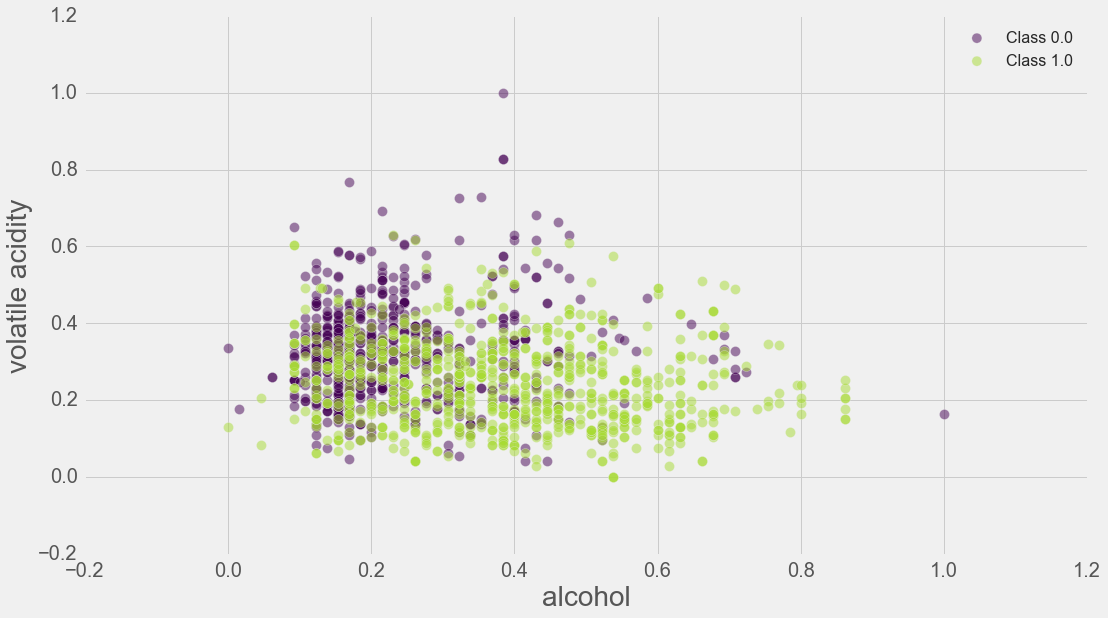

In [79]:
plot_data(size = 100, alpha = 0.5, x = 0, y = 1, color = colormap)

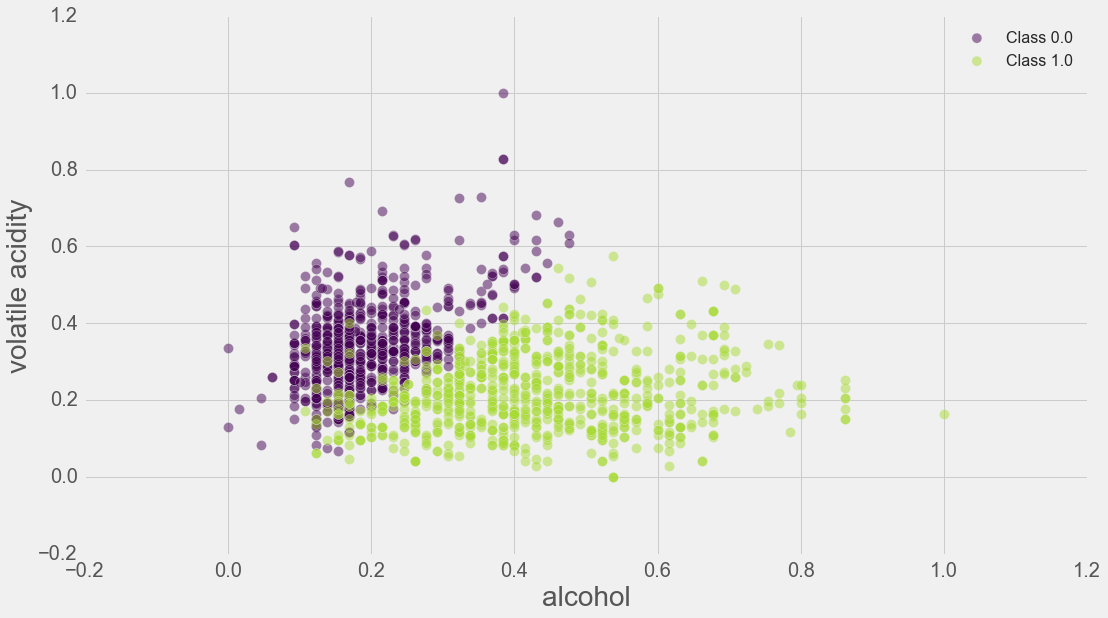

In [80]:
pred_plot(size = 100, alpha = 0.5, x = 0, y = 1, color = colormap)

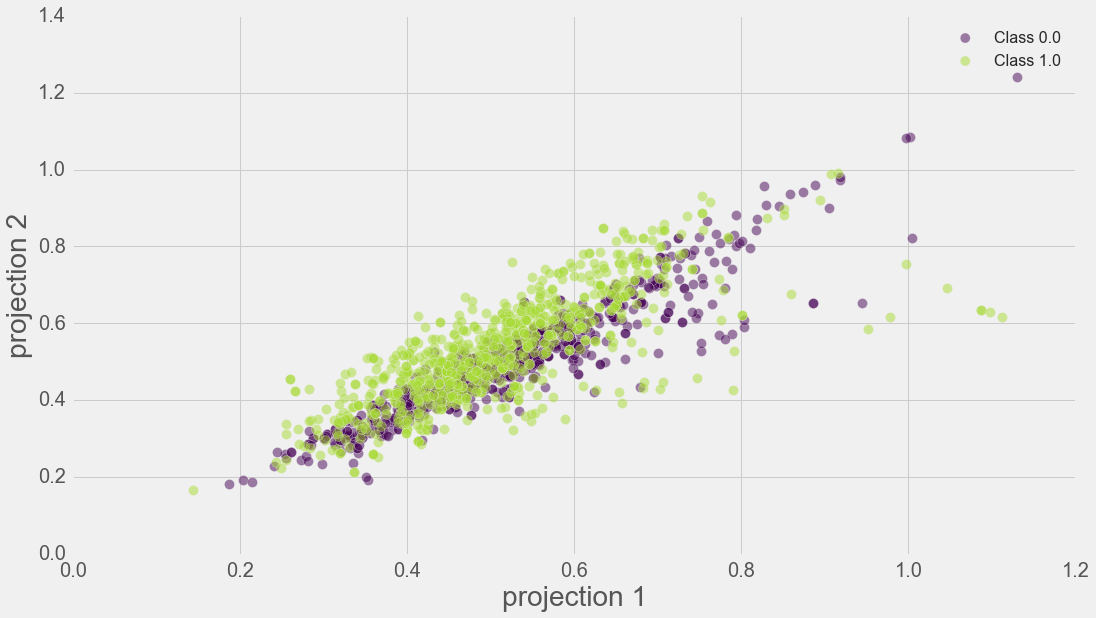

In [81]:
A1=[(0.25,0.6),(1,1),(0.8,0.25)]
project(plane = A1, size = 10, alpha = 1, x = 0, y = 1, color = colormap)

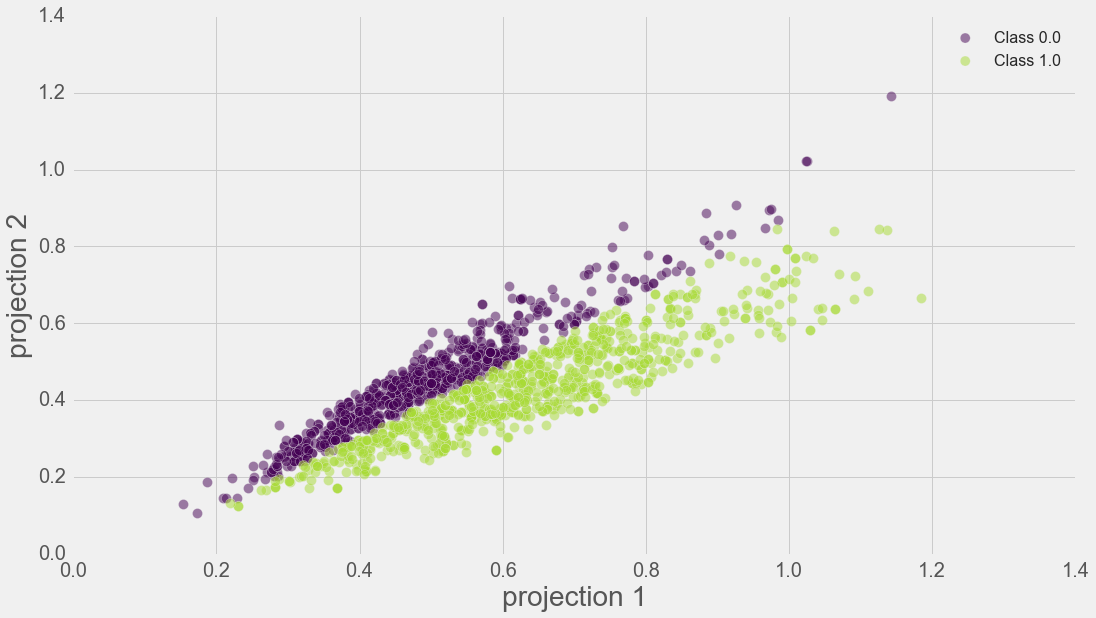

In [82]:
A1=[(1,0.5),(0.75,1),(0.2,0)]
project(plane = A1, size = 10, alpha = 1, x = 0, y = 1, color = colormap)

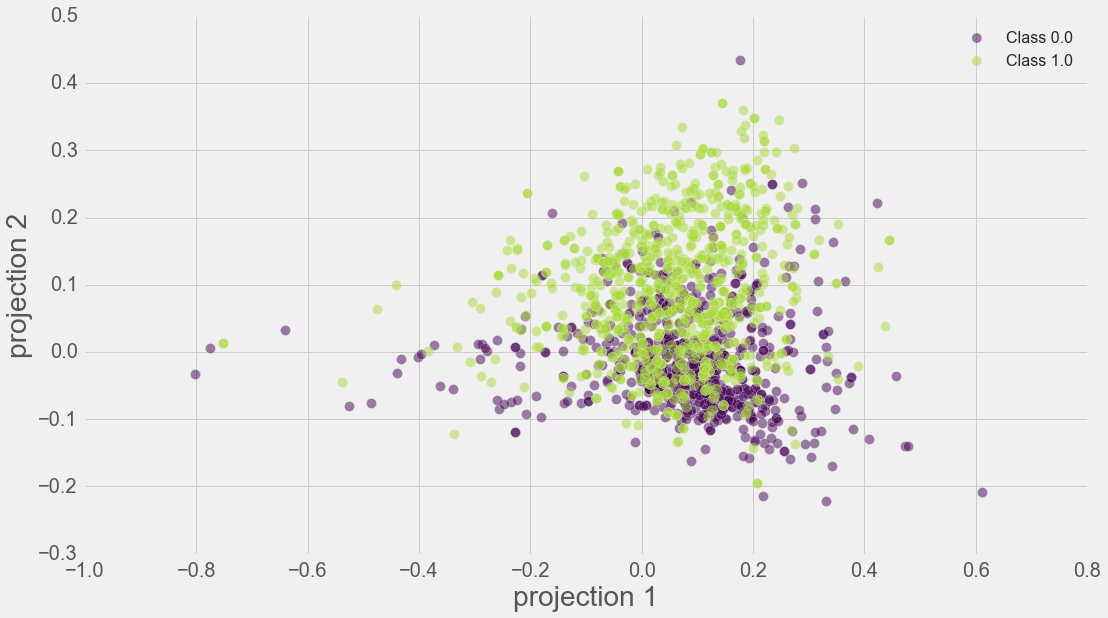

In [90]:
A1=[(.4,0.5),(.5,-.4),(-1,0)]
projectMain(plane = A1, size = 10, alpha = 1, x = 0, y = 1, color = colormap)